# This project, I'll go through some basics of linear & polynomial regression and study in detail the meaning of splines and their implementation.

In [1]:
# Import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from google.colab import files
files.upload()

Saving Wage.csv to Wage.csv


{'Wage.csv': b'ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage\r\n231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063335,75.04315402\r\n86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255272505,70.47601965\r\n161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061263,130.9821774\r\n155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041392685,154.685293\r\n11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063335,75.04315402\r\n376662,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.84509804,127.1157438\r\n450601,2009,44,1. Male,2. Married,4. Other,3. Some College,2. M

In [3]:
# Read dataset
data = pd.read_csv('Wage.csv')

data.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


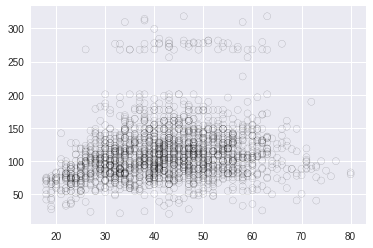

In [4]:
data_x = data['age']                           # independent variable
data_y = data['wage']                          # dependent variable

# Dividing data into train and validation datasets
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

# Visualise the relationship b/w age and wage
import matplotlib.pyplot as plt
plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()

# Linear Regression

Linear regression is the simplest and most widely used statistical technique for predictive modelling. It is a supervised learning algorithm for solving regression based tasks.

It is called a linear model as it establishes a linear relationship between the dependent and independent variables. It basically gives us a linear equation where we have our features as independent variables with coefficients.

Here, we have Y as our dependent variable, the X’s are the independent variables and all betas are the coefficients. Coefficients are the weights assigned to the features. They signify the importance of each of the features.

So, let’s try to understand linear regression with only one feature, i.e., only one independent variable. It is called Simple Linear Regression.

**As we are using only ‘age’ (Independent Variable) to predict the ‘wages’ (Dependent Variable) of the employees, we will implement simple linear regression on the training dataset and calculate the error (RMSE) on the validation dataset.**

In [5]:
from sklearn.linear_model import LinearRegression

# Fitting linear regression model
x = train_x.reshape(-1,1)
model = LinearRegression()
model.fit(x,train_y)
print(model.coef_)
print(model.intercept_)

[0.72190831]
80.65287740759283


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


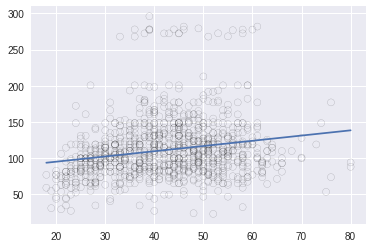

In [6]:
# Prediction on validation dataset
valid_x = valid_x.reshape(-1,1)
pred = model.predict(valid_x)

# Visualisation
# We will use 70 plots between minimum and maximum values of valid_x for plotting
xp = np.linspace(valid_x.min(),valid_x.max(),70)
xp = xp.reshape(-1,1)
pred_plot = model.predict(xp)

plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

In [7]:
# We can now calculate the RMSE on the predictions
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(valid_y, pred))
print(rms)

40.436687488017256


**We can infer from the above graph, that linear regression is not capturing all the signals available and is not the best method for solving this wage prediction.**

Although linear models are relatively simple to describe and implement and have advantages over other approaches in terms of interpretation and inference, they have significant limitations in terms of predictive power. This is because they assume the linear combination between the dependent and independent variables which is almost always an approximation, and sometimes a poor one.

# Improvement over Linear Regression: Polynomial Regression

The type of regression technique, which uses a non linear function, is called Polynomial regression.

Polynomial regression extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. For example, a cubic regression uses three variables , as predictors. This approach provides a simple way to provide a non-linear fit to data.

The standard method to extend linear regression to a non-linear relationship between the dependent and independent variables, has been to replace the linear model with a polynomial function.

As we increase the power value, the curve obtained contains high oscillations which will lead to shapes that are over-flexible. Such curves lead to over-fitting.

[ -0.05194765   5.22868974 -10.03406116]


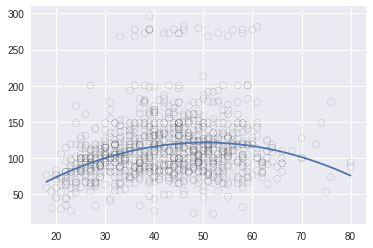

In [8]:
# Generating weights for polynomial function with degree =2
weights = np.polyfit(train_x, train_y, 2)
print(weights)

# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred = model(valid_x)

# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred_plot = model(xp)
plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

# Regression splines along with its Implementations

In order to overcome the disadvantages of polynomial regression, we use an improved regression technique which, instead of building one model for the entire dataset, divides the dataset into multiple bins and fits each bin with a separate model. Such a technique is known as Regression spline.

Regression splines is one of the most important non linear regression techniques. In polynomial regression, we generated new features by using various polynomial functions on the existing features which imposed a global structure on the dataset. To overcome this, we can divide the distribution of the data into separate portions and fit linear or low degree polynomial functions on each of these portions.

The points where the division occurs are called Knots. Functions which we can use for modelling each piece/bin are known as Piecewise functions. There are various piecewise functions that we can use to fit these individual bins.

**Piecewise Step Functions**

One of the most common piecewise functions is a Step function. Step function is a function which remains constant within the interval. We can fit individual step functions to each of the divided portions in order to avoid imposing a global structure. Here we break the range of X into bins, and fit a different constant in each bin.

In [13]:
# Dividing the data into 4 bins
df_cut, bins = pd.cut(train_x, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(17.938, 33.5]    504
(33.5, 49.0]      941
(49.0, 64.5]      511
(64.5, 80.0]       54
Name: age, dtype: int64

In [23]:
df_steps = pd.concat([train_x, df_cut, train_y], keys=['age','age_cuts','wage'], axis=1)

# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies.head()

,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
1382,0,1,0,0
23,0,1,0,0
2140,0,0,1,0
1117,1,0,0,0
933,0,1,0,0


We can plot polynomial curves for different degree values.

In [25]:
df_steps_dummies.columns = ['17.938-33.5','33.5-49','49-64.5','64.5-80'] 

# Fitting Generalised linear models
fit3 = sm.GLM(df_steps.wage, df_steps_dummies).fit()

# Binning validation set into same 4 bins
def binMapping(x): 
  flat = [] 
  prestep = np.digitize(x, bins)
  for sublist in prestep:
    for ele in sublist:
      flat.append(ele)  
  return np.array(flat)

bin_mapping = binMapping(valid_x)
X_valid = pd.get_dummies(bin_mapping)

# Removing any outliers
X_valid = pd.get_dummies(bin_mapping).drop([5], axis=1)

# Prediction
pred2 = fit3.predict(X_valid)

# Calculating RMSE
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid_y, pred2)) 
print(rms) 

# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max()-1,70) 
bin_mapping = np.digitize(xp, bins) 
X_valid_2 = pd.get_dummies(bin_mapping) 
pred2 = fit3.predict(X_valid_2)

39.990600783110395


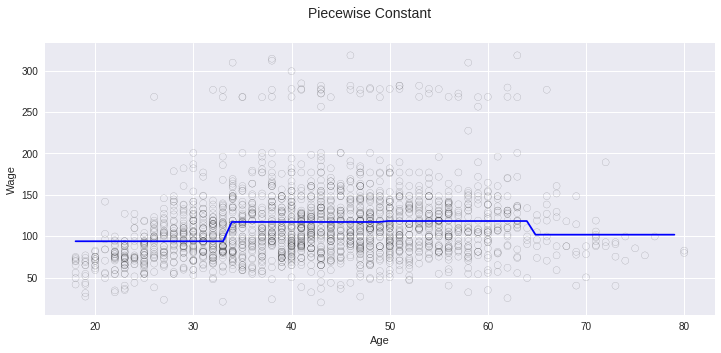

In [27]:
# Visualisation
fig, (ax1) = plt.subplots(1,1, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(xp, pred2, c='b')

ax1.set_xlabel('Age')
ax1.set_ylabel('Wage')
plt.show()

Binning has its obvious conceptual issues. Most prominently, we expect most phenomena we study to vary continuously with inputs. Binned regression does not create continuous functions of the predictor, so in most cases we would expect no relationship between the input and output.

For example, in the above graph, we can see that the first bin clearly misses the increasing trend of wage with age.

**Cubic and Natural Cubic Splines**

Cubic spline is a piecewise polynomial with a set of extra constraints (continuity, continuity of the first derivative, and continuity of the second derivative). In general, a cubic spline with K knots uses cubic spline with a total of 4 + K degrees of freedom. There is seldom any good reason to go beyond cubic-splines (unless one is interested in smooth derivatives).

39.40318768341125
39.34292609147627


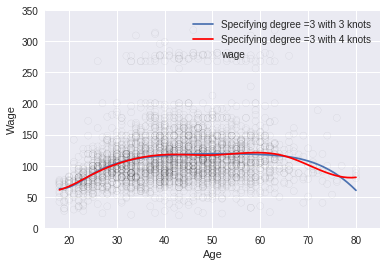

In [28]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generating cubic spline with 3 knots at 25, 40 and 60
transformed_x = dmatrix("bs(train, knots=(25,40,60), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
fit1 = sm.GLM(train_y, transformed_x).fit()

# Generating cubic spline with 4 knots
transformed_x2 = dmatrix("bs(train, knots=(25,40,50,65),degree =3, include_intercept=False)", {"train": train_x}, return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
fit2 = sm.GLM(train_y, transformed_x2).fit()

# Predictions on both splines
pred1 = fit1.predict(dmatrix("bs(valid, knots=(25,40,60), include_intercept=False)", {"valid": valid_x}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(valid, knots=(25,40,50,65),degree =3, include_intercept=False)", {"valid": valid_x}, return_type='dataframe'))

# Calculating RMSE values
rms1 = sqrt(mean_squared_error(valid_y, pred1))
print(rms1)

rms2 = sqrt(mean_squared_error(valid_y, pred2))
print(rms2)


# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)

# Make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", {"xp": xp}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(xp, knots=(25,40,50,65),degree =3, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

# Plot the splines and error bands
plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, label='Specifying degree =3 with 3 knots')
plt.plot(xp, pred2, color='r', label='Specifying degree =3 with 4 knots')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()

We know that the behavior of polynomials that are fit to the data tends to be erratic near the boundaries. Such variability can be dangerous. These problems are resembled by splines, too. The polynomials fit beyond the boundary knots behave even more wildly than the corresponding global polynomials in that region. To smooth the polynomial beyond the boundary knots, we will use a special type of spline known as Natural Spline.

A natural cubic spline adds additional constraints, namely that the function is linear beyond the boundary knots. This constrains the cubic and quadratic parts there to 0, each reducing the degrees of freedom by 2. That’s 2 degrees of freedom at each of the two ends of the curve, reducing K+4 to K.

39.44823813743623


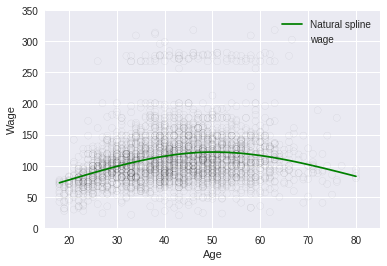

In [29]:
# Generating Natural Cubic spline
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": train_x}, return_type='dataframe')
fit3 = sm.GLM(train_y, transformed_x3).fit()

# Prediction on validation set
pred3 = fit3.predict(dmatrix("cr(valid, df=3)", {"valid": valid_x}, return_type='dataframe'))

# Calculating RMSE value
rms = sqrt(mean_squared_error(valid_y, pred3))
print(rms)

# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred3 = fit3.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

# Plot the spline
plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred3,color='g', label='Natural spline')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.show()